<a href="https://colab.research.google.com/github/pedrohmpaiva/analisando-dados-airbnb/blob/main/Analisando_os_Dados_do_Airbnb_Nashville.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://github.com/pedrohmpaiva/portfolio/blob/main/banner.png?raw=true">

*por: [Pedro Henrique M. Paiva](https://www.linkedin.com/in/pedro-henrique-paiva/)*

---

# Análise dos Dados do Airbnb - *Nashville, Tennessee, Estados Unidos*

<center><img alt="Analisando Airbnb" width="50%" src="https://rotadeferias.com.br/wp-content/uploads/2019/08/JakeMatthews_HonkeyTonkHwy_2019.jpg"></center>

---
O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<br/><br/>
**Neste *notebook*, iremos analisar os dados referentes à cidade Nashville, e ver quais insights podem ser extraídos a partir de dados brutos.**
<br/><br/>

Nashville é a capital do estado do Tennessee, nos EUA, e é onde fica a Universidade Vanderbilt. Um dos principais espaços de eventos da lendária música country é a Grand Ole Opry House, casa do famoso programa de rádio e palco "Grand Ole Opry". O Country Music Hall of Fame and Museum e o histórico Ryman Auditorium ficam no centro da cidade, assim como o Distrito, com bares "honky-tonk" com música ao vivo e o Johnny Cash Museum, que celebra a vida do cantor. 

Fonte ― Google

---

# **Obtendo os Dados**
---

Para a análise exploratória inicial, foi baixado o seguinte arquivo:

* `listings.csv` - *Summary information and metrics for listings in Nashville (good for visualisations).*

Este dataset é uma versão resumida, ideal apenas para uma abordagem inicial.


In [ ]:
# importar os pacotes necessarios

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
%matplotlib inline

In [ ]:
# importando o arquivo listings.csv para um DataFrame

dados = pd.read_csv('http://data.insideairbnb.com/united-states/tn/nashville/2021-09-21/visualisations/listings.csv')

# **Análise dos Dados**
---

**Dicionário das variáveis**


* `id` - número de id gerado para identificar o anúncio do imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias




Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrando as 5 primeiras entradas
dados.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6422,Nashville Charm,12172,Michele,NaN,District 6,36.17315,-86.73581,Private room,40,30,674,2020-03-02,6.72,1,123,0,NaN
1,25613,Room in Historic East Nashville Craftsman Home,95811,Nell,NaN,District 6,36.17826,-86.74162,Private room,77,2,510,2020-03-14,5.31,1,256,0,NaN
2,258817,ButterflyRoom-private bath- open in oct,22296,Diana,NaN,District 12,36.16249,-86.58988,Private room,29,30,96,2019-12-14,1.14,7,276,0,NaN
3,289242,"MorningstarHouse, monthly room- open sept",22296,Diana,NaN,District 12,36.16102,-86.59207,Private room,28,30,76,2019-01-12,0.65,7,325,0,NaN
4,319705,"SuperSweetSTUDIO, jacuzzi, monthly",22296,Diana,NaN,District 12,36.16296,-86.59187,Private room,31,30,48,2020-07-03,0.41,7,347,0,NaN


# **1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**
---

In [ ]:
# Identificando o volume de dados do dataset e posteriormente verificando os tipos das variáveis.

print('***************************************************')
print('*** O dataset possui {} linhas e {} colunas   ***'.format(dados.shape[0],dados.shape[1]))
print('***************************************************')

dados.dtypes

***************************************************
*** O dataset possui 6240 linhas e 18 colunas   ***
***************************************************


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

# **2. Qual a porcentagem de valores ausentes no *dataset*?**
---

In [ ]:
# Verificando a porcentagem de dados faltantes em cada atributo

(dados.isnull().sum() / dados.shape[0]).sort_values(ascending= False) * 100

license                           100.000000
neighbourhood_group               100.000000
reviews_per_month                  11.506410
last_review                        11.506410
host_name                           0.897436
longitude                           0.000000
name                                0.000000
host_id                             0.000000
neighbourhood                       0.000000
latitude                            0.000000
room_type                           0.000000
number_of_reviews_ltm               0.000000
price                               0.000000
minimum_nights                      0.000000
number_of_reviews                   0.000000
calculated_host_listings_count      0.000000
availability_365                    0.000000
id                                  0.000000
dtype: float64

# **3. Qual o tipo de distribuição das variáveis?** 
---

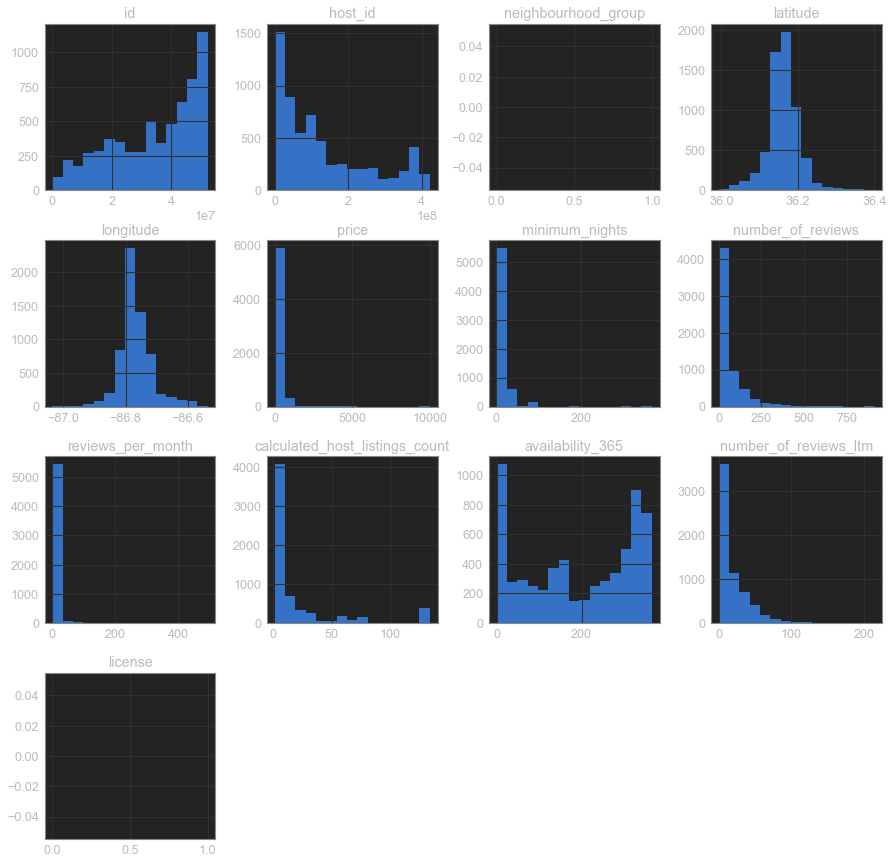

In [ ]:
# Plotando histogramas das variáveis numéricas
dados.hist(bins= 15, figsize= (15, 15));

---
* Vendo os gráficos, logo de cara já percebo outliers em `price` e `minimum_nights`. Como as colunas `neighbourhood_group` e `license` estão com 100% dos dados ausentes, irei excluílos da minha análise
---

In [ ]:
dados[['price', 'minimum_nights', 'number_of_reviews', 
       'reviews_per_month','calculated_host_listings_count', 'availability_365']].describe().round(2)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,6240.00,6240.00,6240.00,5522.00,6240.00,6240.00
mean,274.47,7.20,60.40,4.54,18.51,190.65
std,360.44,19.04,90.21,13.13,33.66,128.72
min,0.00,1.00,0.00,0.01,1.00,0.00
25%,118.75,1.00,5.00,1.00,1.00,65.00
50%,199.00,2.00,27.00,2.29,3.00,204.00
75%,321.25,3.00,78.00,4.21,17.00,320.00
max,10000.00,365.00,907.00,493.00,134.00,365.00


# **Tratando outliers**
---

Sobre os outliers em `price` e `minimum_nights`:

* A variável `price` tem o mínimo em 0.
* Lembrando que a variável `price` trata do preço da diária dos imóveis em dólares (USD), estamos vendo que o Q3 está em 321 dólares, mas o máximo está em 10 mil dórales. Com certeza, um outlier aqui.
* A variável `minimum_nights` tem como seu máximo o valor 365, sendo que o Q3 está em 3. Claramente temos outliers nessa variável.
* As variáveis `number_of_reviews`, `calculated_host_listings_count` e `availability_365` também podem conter outliers, porém o objetivo desta análise é conseguir insights observando o preço e a quantidade de noites de cada imóvel




Para tratamento dos outliers desse conjunto de dados, fiz uma análise da distribuição estatística, plotei boxplots e calculei os limites utilizando a regra do IQR Score.


* O IQR é calculado subtraindo o Terceiro Quartil (75%) pelo Primeiro Quartil (25%). Então com estes valores, podemos descobrir os limites superiores e inferiores do nosso conjunto de dados.

In [ ]:
# Calculando o IQR - Price

q1_price = dados.price.quantile(.25)
q3_price = dados.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR da variável    "price": ', IQR_price)

# Definindo os limites                                       
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Limite superior de "price": ', sup_price)
print('Limite inferior de "price": ', inf_price)

IQR da variável    "price":  202.5
Limite superior de "price":  625.0
Limite inferior de "price":  -185.0


In [ ]:
# Calculando o IQR - minimum_nights

q1_minimum_nights = dados.minimum_nights.quantile(.25)
q3_minimum_nights = dados.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('IQR da variável de "minimum_nights": ', IQR_minimum_nights)

# definindo os limites                                       
sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print('Limite superior de "minimum_nights": ', sup_minimum_nights)
print('Limite inferior de "minimum_nights": ', inf_minimum_nights)

IQR da variável de "minimum_nights":  2.0
Limite superior de "minimum_nights":  6.0
Limite inferior de "minimum_nights":  -2.0


---
* **Limites inferiores a 0 quer dizer que não temos outliers negativos. Mas ainda sim, na variável price, preciso remover o valor 0. Apesar de não ser um outlier, não é condizente com a realidade.**
---

In [ ]:
# Conferindo o registro price = 0

dados.query('price == 0')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
5141,49069442,Hotel Preston,267913366,Hotel,NaN,District 13,36.142962,-86.701838,Hotel room,0,1,289,2021-09-19,13.68,1,0,185,NaN


## Boxplot dos outliers - Antes da limpeza
---


-> Price: valores acima de 625 
-> 429 entradas                   
-> 6.8750%                       


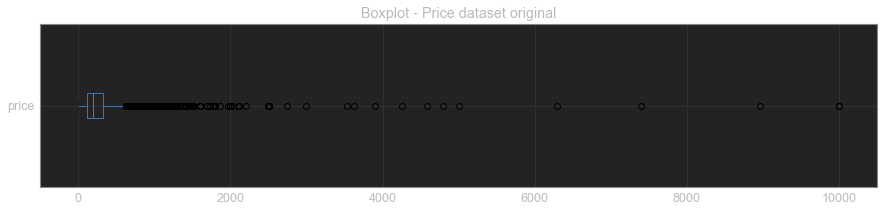

In [ ]:
#Plotando um boxplot com outliers da coluna Price
dados['price'].plot(kind= 'box', vert= False, figsize= (15,3), 
                    title= 'Boxplot - Price dataset original')

# Verificando quantidade de valores acima de 625 para price. Valor do limite superior obtido no IQR.
print("\n-> Price: valores acima de 625 ")
print("-> {} entradas                   ".format(len(dados[dados.price > 625])))
print("-> {:.4f}%                       ".format((len(dados[dados.price > 625]) / dados.shape[0])*100))

minimum_nights: valores acima de 6:
808 entradas
12.9487%


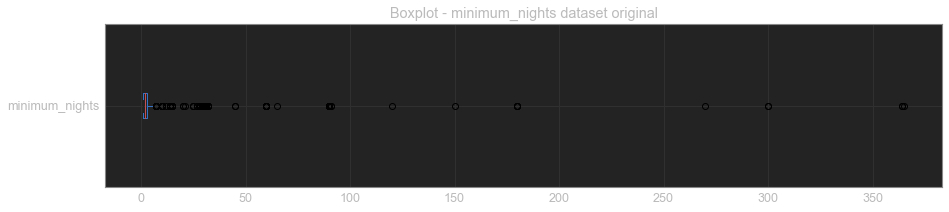

In [ ]:
# Plotando um boxplot com outliers da coluna minimum_nights
dados.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3),
                          title= 'Boxplot - minimum_nights dataset original')


# Verificando quantidade de valores acima de 6 diárias para minimum_nights. Valor do limite superior obtido no IQR.
print("minimum_nights: valores acima de 6:")
print("{} entradas".format(len(dados[dados.minimum_nights > 6])))
print("{:.4f}%".format((len(dados[dados.minimum_nights > 6]) / dados.shape[0])*100))

---
* Usando os limites superiores obtidos no IQR, cortei os dados acima dos valores, nas colunas `price ` & `minimum_nights`.

* Apesar de ter uma porcentagem considerável de perda dos dados, optei pela exclusão mesmo assim, priorizando a **qualidade** dos dados. A variável mais afetada foi `minimum_nights`, com 12% de perda.
---

## Limpando os dados
---

Shape antes da limpeza:  (6240, 18)
Shape após a limpeza:    (5018, 16)


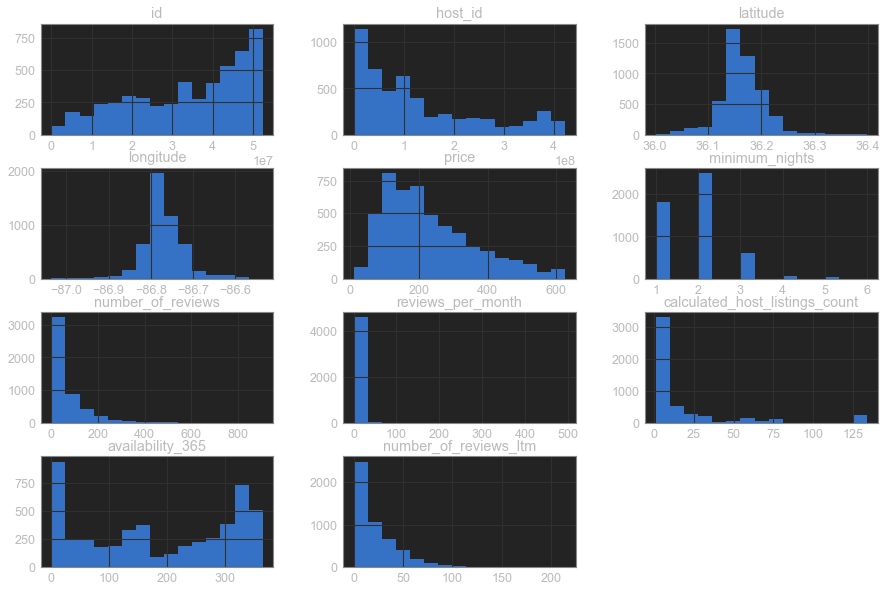

In [ ]:
#Antes de tudo, faço uma cópia do meu dataset
dados_filtrados = dados.copy()

# Aqui começo a remover os outliers de price e minimum_nights
dados_filtrados.drop(dados_filtrados[dados_filtrados['price'] > 625].index,        axis=0, inplace= True)
dados_filtrados.drop(dados_filtrados[dados_filtrados['price'] == 0].index,         axis=0, inplace= True)

dados_filtrados.drop(dados_filtrados[dados_filtrados['minimum_nights'] > 6].index, axis=0, inplace= True)

#Aqui excluo as duas colunas com os valores 100% ausentes
dados_filtrados.drop(['neighbourhood_group', 'license'], axis= 1, inplace= True)

print('Shape antes da limpeza: ', dados.shape)
print('Shape após a limpeza:   ',dados_filtrados.shape)

dados_filtrados.hist(bins= 15, figsize=(15,10));

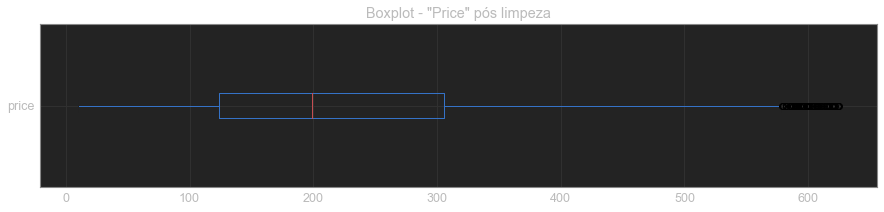

In [ ]:
#Boxplot - price limpo
dados_filtrados['price'].plot(kind= 'box', vert= False, figsize= (15,3), 
                    title= 'Boxplot - "Price" pós limpeza');


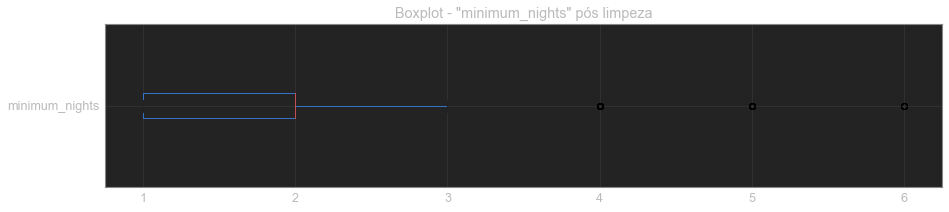

In [ ]:
# Boxplot - minimum_nights limpo

dados_filtrados.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3),
                          title= 'Boxplot - "minimum_nights" pós limpeza');

# **4. Qual a média dos preços de aluguel?**
---

In [ ]:
# ver a média da coluna `price``
dados['price'].mean()

274.47083333333336

In [ ]:
#Aqui eu verifico quantos anúncios existem por bairro
dados['neighbourhood'].value_counts()

District 19    1422
District 17     812
District 5      621
District 21     584
District 6      504
District 15     315
District 7      230
District 18     211
District 2      182
District 20     150
District 24     128
District 8      126
District 16     107
District 26      84
District 14      76
District 13      72
District 12      60
District 25      54
District 1       46
District 29      43
District 3       42
District 30      40
District 23      38
District 10      36
District 4       31
District 27      30
District 35      28
District 22      27
District 11      25
District 32      23
District 33      22
District 31      22
District 28      21
District 9       16
District 34      12
Name: neighbourhood, dtype: int64

# **5. Qual a correlação existente entre as variáveis?**
---

In [ ]:
#Correlações e heatmap

corr = dados_filtrados[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr().style.background_gradient(cmap='coolwarm')
corr

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.201124,-0.226289,-0.071290,0.066388,0.259752
minimum_nights,0.201124,1.000000,-0.157232,-0.112647,0.024175,-0.015021
number_of_reviews,-0.226289,-0.157232,1.000000,0.204383,-0.164742,-0.042218
reviews_per_month,-0.071290,-0.112647,0.204383,1.000000,-0.040802,-0.012391
calculated_host_listings_count,0.066388,0.024175,-0.164742,-0.040802,1.000000,0.318234
availability_365,0.259752,-0.015021,-0.042218,-0.012391,0.318234,1.000000


# **6. Qual o tipo de imóvel mais alugado no Airbnb?**
---

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
dados_filtrados['room_type'].value_counts()

Entire home/apt    4443
Private room        511
Hotel room           53
Shared room          11
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(dados_filtrados['room_type'].value_counts() / dados_filtrados.shape[0]) * 100

Entire home/apt    88.541251
Private room       10.183340
Hotel room          1.056198
Shared room         0.219211
Name: room_type, dtype: float64

# **7. Qual a localidade mais cara do dataset?**
---

In [ ]:
#Aqui eu exibo uma média de preços por bairros

dados_filtrados.groupby('neighbourhood').mean()['price'].sort_values(ascending= False).round(2)

neighbourhood
District 2     268.42
District 5     261.30
District 21    260.89
District 17    258.09
District 19    249.05
District 18    240.99
District 20    225.41
District 6     212.92
District 24    207.75
District 3     203.56
District 25    198.64
District 1     183.84
District 15    182.01
District 13    181.22
District 10    181.00
District 7     179.07
District 29    174.81
District 8     173.58
District 23    171.00
District 14    167.28
District 22    166.54
District 16    151.19
District 12    149.30
District 26    147.65
District 33    146.83
District 11    142.46
District 30    129.58
District 35    126.80
District 4     126.19
District 9     126.14
District 27    124.88
District 32    120.57
District 34    117.00
District 28    112.41
District 31     81.30
Name: price, dtype: float64

In [ ]:
# Exibindo os 5 primeiros bairros com mais anúncios
dados_filtrados['neighbourhood'].value_counts().head()

District 19    1214
District 17     649
District 5      529
District 21     461
District 6      424
Name: neighbourhood, dtype: int64

# **Tratando dados nulos**
---

In [ ]:
dados_filtrados.isnull().sum()

id                                  0
name                                0
host_id                             0
host_name                          56
neighbourhood                       0
latitude                            0
longitude                           0
room_type                           0
price                               0
minimum_nights                      0
number_of_reviews                   0
last_review                       361
reviews_per_month                 361
calculated_host_listings_count      0
availability_365                    0
number_of_reviews_ltm               0
dtype: int64

## "reviews_per_month"

* A coluna `reviews_per_month` são a quantidade de reviews que os imóveis recebem por mês. As entradas nulas eram de imóveis que não tinha recebido nenhum review. Optei por setar o valor 0 para estas entradas.

In [ ]:
#Antes do tratamento
dados_filtrados['reviews_per_month'].isnull().sum()

361

In [ ]:
dados_filtrados['reviews_per_month'].fillna(value= 0, inplace= True)

In [ ]:
# Depois do tratamento
dados_filtrados['reviews_per_month'].isnull().sum()

0

## "last_review"

In [ ]:
#Antes da limpeza
dados_filtrados['last_review'].isnull().sum()

361

In [ ]:
# Convertendo a coluna last_review para tipo datetime.
dados_filtrados['last_review'] = pd.to_datetime(dados_filtrados['last_review'], format="%Y-%m-%d")

In [ ]:
dados_filtrados['last_review'].mean()

Timestamp('2021-06-11 22:14:14.970997504')

---
* Para substituição dos dados nulos, optei por usar a média das datas da coluna

* Ao usar o fillna() de maneira direta(só passando a data média obtida acima) na coluna `last_review`, os valores preenchidos foram com dados de horário. Então para manter somente os valores da data, usei o `.dt.date` e em seguida o  `.fillna(value= '2021-6-11')`. Dessa forma fiz com que somente a data fosse substituída
---

In [ ]:
dados_filtrados['last_review'] = dados_filtrados['last_review'].dt.date.fillna(value= '2021-6-11')

In [ ]:
#Depois da limpeza
dados_filtrados['last_review'].isnull().sum()

0

## "host_name"

* Neste cenário, como não me é relevante a informação do nome do anfitrião, optei por remover toda coluna.
* A remoção de linhas não seria interessante, visto que as outras colunas estão com informações relevantes e resultaria somente em perda de dados.

In [ ]:
nulos = dados_filtrados['host_name'].isnull()
dados_filtrados[nulos]

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
2913,35679923,"Sunny Club Wyndham Nashville, 1 Bedroom Suite",194953121,NaN,District 7,36.21944,-86.70746,Entire home/apt,136,2,2,2020-01-01,0.09,56,329,0
2957,36132444,"Commodious Club Wyndham Nashville, 2 Bedroom C...",194953121,NaN,District 15,36.22111,-86.70536,Entire home/apt,170,2,3,2021-04-25,0.15,56,0,2
3087,37599205,"Sunny Club Wyndham Nashville, 2 Bedroom Condo",194953121,NaN,District 15,36.21921,-86.70460,Entire home/apt,170,2,2,2021-06-01,0.08,56,0,1
3217,38716138,"Exquisite Club Wyndham Nashville, 1 Bedroom Suite",194953121,NaN,District 7,36.22098,-86.70790,Entire home/apt,136,2,10,2021-09-19,7.32,56,324,8
3282,39280367,"Club Wyndham Nashville, Tennessee, 1 Bedroom S...",194953121,NaN,District 7,36.22087,-86.70782,Entire home/apt,136,2,1,2020-01-01,0.05,56,324,0
3283,39280370,"Extravagant Club Wyndham Nashville, 1 Bedroom",194953121,NaN,District 7,36.21996,-86.70783,Entire home/apt,136,2,0,2021-6-11,0.00,56,332,0
3284,39280372,"Exquisite Club Wyndham Nashville, 1 Bedroom Suite",194953121,NaN,District 15,36.21973,-86.70599,Entire home/apt,136,3,2,2021-08-25,0.40,56,331,2
3285,39280375,"Sunny Club Wyndham Nashville, 1 Bedroom Suite",194953121,NaN,District 15,36.22127,-86.70661,Entire home/apt,136,2,1,2020-02-01,0.05,56,331,0
3286,39280377,"Exquisite Club Wyndham Nashville, 1 Bedroom Suite",194953121,NaN,District 15,36.21932,-86.70678,Entire home/apt,136,4,0,2021-6-11,0.00,56,324,0
3287,39280378,"Extravagant Club Wyndham Nashville, 1 Bedroom",194953121,NaN,District 7,36.21958,-86.70813,Entire home/apt,136,2,0,2021-6-11,0.00,56,328,0


In [ ]:
dados_filtrados.drop(columns= 'host_name', axis= 1, inplace= True)

In [ ]:
#Dataset com os dados nulos limpos
dados_filtrados.isnull().sum()

id                                0
name                              0
host_id                           0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64

# **8. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**
---

In [ ]:
# verificando a média da coluna `minimum_nights``
dados_filtrados['minimum_nights'].mean()

1.810880829015544

# **Conclusões**
---


* Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem outliers em algumas das variáveis.

* Nota-se também que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

* Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.